# Data Distribution

**Skewness** is the symmetry or lack of symmetry of data. Bowley’s coefficient of skewness can be used to assess the skewness of data and is calculated as follows:
<br><br>
S = [Q3 – 2Q2 + Q1] / [Q3 – Q1]
<br>
where Q1, Q2 and Q3 are the first, second and third quartiles respectively.
<br><br>
For this coefficient of skewness (S), we have the following conclusions:
- If S = 0, the distribution is symmetrical
- If S > 0, the distribution is positively skewed
- If S < 0, the distribution is negatively skewed

Recall the sample dataset that contains 1985 model import cars and the specification of each auto in terms of its various characteristics.  This data is stored as a CSV file on the Math@Work server.

In [35]:
import pandas as pd
autos = pd.read_csv('https://www.mathatwork.org/DATA/automobiles.csv')
print(autos.head())

          make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location  wheel-base  length  width  height  curb-weight engine-type  \
0           front        88.6   168.8   64.1    48.8         2548        dohc   
1           front        88.6   168.8   64.1    48.8         2548        dohc   
2           front        94.5   171.2   65.5    52.4         2823        ohcv   
3           front        99.8   176.6   66.2    54.3         2337         ohc   
4           front        99.4   176.6   66.4    54.3         2824         ohc   

  num-of-cylinders  engine-size fuel-system 

Let's examine the *autos* summary statistics.

In [3]:
summary = autos.describe()
print(summary)

       wheel-base      length       width      height  curb-weight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       engine-size  compression-ratio    city-mpg  highway-mpg         price  
count   205.000000         205.000000  205.000000   205.000000    201.000000  
mean    126.907317          10.142537   25.219512    30.751220  13207.129353  
std      41.642693           3.972040    6.542142     6.886443   7947.066342  
min      61.000000           7.000000   13.000000    

Notice that the summary statistics was saved into a DataFrame named *summary*.  We can now loop through this DataFrame to calculate Bowley coefficients, *S*, for each data column.

In [32]:
Q1 = '25%'
Q2 = '50%'
Q3 = '75%'
for y in summary:
    S = (summary[y][Q3] - 2*summary[y][Q2] + summary[y][Q1])/(summary[y][Q3] - summary[y][Q1])
    print(y,':  S =',S)

wheel-base :  S = 0.367088607595
length :  S = 0.178571428571
width :  S = 0.0
height :  S = -0.2
curb-weight :  S = 0.318987341772
engine-size :  S = -0.0454545454545
compression-ratio :  S = 0.0
city-mpg :  S = 0.0909090909091
highway-mpg :  S = -0.111111111111
price :  S = 0.422349570201


This indicates that *wheel-base*, *length*, *curb-weight*, *city-mpg* and *price* are all right skewed.  Furthermore, *height*, *engine-size* and *highway-mpg* are all left skewed.  Finally, *width* and *compression-ratio* are symmetrical.

# Identifying Outliers

An outlier is an observation point that is abnormally distant from other observation points in the data.  The presence of outliers can be determined using a boxplot.  If there are any outliers in a dataset, they would be plotted as single points above or below (or left of or right of, depending on boxplot orientation) the boxplot itself. The presence of outliers expose that the data is highly varied and could ultimately skew analysis results. In addition, they could indicate a problem in the data such as measurement or input error.

Let's check for outliers using boxplots.  We will loop through the columns of the *summary* DataFrame and then using Pandas **.boxplot( )**, plot each boxplot.

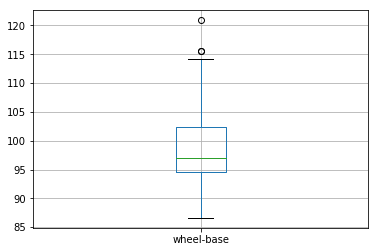

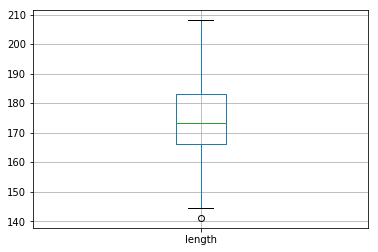

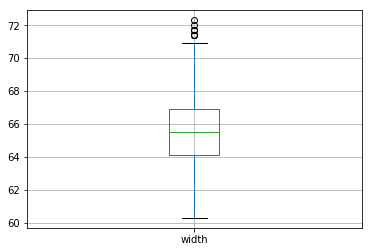

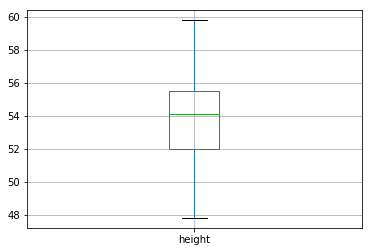

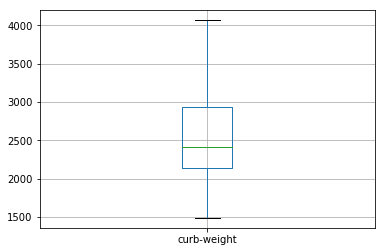

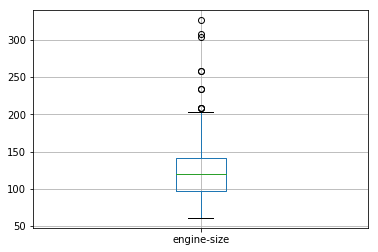

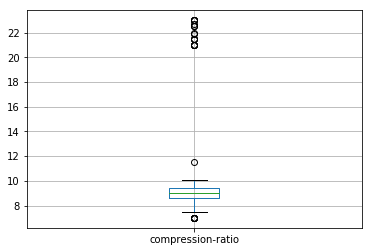

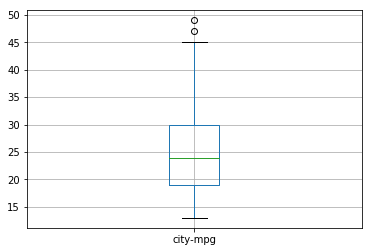

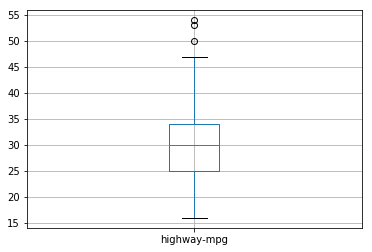

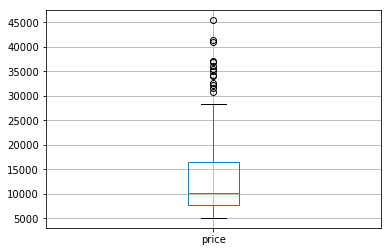

In [46]:
import matplotlib.pyplot as plt
for y in summary:
    autos.boxplot(column=[y])
    plt.show()

Notice that it only makes sense to plot the columns in the *summary* DataFrame rather than in the *autos* DataFrame because *autos* contains non-numeric columns.

The boxplots indicate the presence of outliers in all columns except *height* and *curb-weight*.  It also verifies the skewness as speculated above that *wheel-base*, *length*, *curb-weight*, *city-mpg* and *price* are all right skewed;   *height* and *highway-mpg* are all left skewed; and *width* is symmetrical. The spread of *engine-size* and *compression-ratio* could not be verified as speculated.

While the *height* and *curb-weight* boxplots indicate these data look to be of good quality for analyses, more insights are needed on the rest to determine whether there is a problem in the data such as measurement or input error.

### Exercise

Recall the sample dataset that contains 150 observations of iris plants and their various characteristics. This data is stored as a CSV file on the Math@Work server.

In [47]:
iris = pd.read_csv('https://mathatwork.org/DATA/iris.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Run the following code to loop through the *summary* DataFrame to calculate Bowley coefficients, S, for each data column.

In [ ]:
summary = iris.describe()
Q1 = '25%'
Q2 = '50%'
Q3 = '75%'
for y in summary:
    S = (summary[y][Q3] - 2*summary[y][Q2] + summary[y][Q1])/(summary[y][Q3] - summary[y][Q1])
    print(y,':  S =',S)

**1)**  What do the Bowley coefficients reveal about the skewness of each column's data? Explain.

Run the following code to loop through the *summary* DataFrame to plot each column's boxplot.

In [ ]:
for y in summary:
    iris.boxplot(column=[y])
    plt.show()

**2)** What do the boxplots reveal regarding outliers?  Explain.

**3)** Which boxplots verify skewness as speculated in question 1 above? Explain.

**4)** Which data do the boxplots indicate are of good quality for analyses?  Explain.